# Notebook for testing the rocket transform 


In [1]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sklearn.decomposition import PCA
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sklearn.feature_selection import SelectKBest, chi2
from sktime.utils.data_processing import from_nested_to_2d_array
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC

figure_path = module_path + '/figures/'

# Loading already extracted features

## UIT

In [44]:
X_train, y_train_o = load_from_tsfile_to_dataframe(module_path + f'/src/adil_TSC_test/transformed_datasets/UiT_transformed_rocket_15s_TRAIN.ts')
X_test, y_test_o = load_from_tsfile_to_dataframe(module_path + f'/src/adil_TSC_test/transformed_datasets/UiT_transformed_rocket_15s_TEST.ts')

X_train, X_test = from_nested_to_2d_array(X_train), from_nested_to_2d_array(X_test)

cols = np.arange(len(X_test.columns))
X_train.columns, X_test.columns = cols, cols

y_train_o, y_test_o = pd.Series(y_train_o), pd.Series(y_test_o)

scaler = MinMaxScaler() 
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train)) 
X_test = pd.DataFrame(scaler.transform(X_test)) 

## 5 Class classification

In [22]:
y_train_o.value_counts()

normal          1775
insp_crackle    1240
exp_wheeze      1163
insp_wheeze      142
exp_crackle      117
dtype: int64

In [23]:
indices_1 = np.where(y_train_o == 'normal')[0]
indices_2 = np.where(y_train_o == 'exp_wheeze')[0]
indices_3 = np.where(y_train_o == 'insp_crackle')[0]
indices_4 = np.where(y_train_o == 'insp_wheeze')[0]
indices_5 = np.where(y_train_o == 'exp_crackle')[0]
indices_train = np.concatenate((indices_1[0:150], indices_2[:150], indices_3[:150], indices_4, indices_5))
#indices_train = np.concatenate((indices_2[:25], indices_3[:25], indices_4, indices_5))

indices_1 = np.where(y_test_o == 'normal')[0]
indices_2 = np.where(y_test_o == 'exp_wheeze')[0]
indices_3 = np.where(y_test_o == 'insp_crackle')[0]
indices_4 = np.where(y_test_o == 'insp_wheeze')[0]
indices_5 = np.where(y_test_o == 'exp_crackle')[0]
indices_test = np.concatenate((indices_1, indices_2, indices_3, indices_4, indices_5))
#indices_test = np.concatenate((indices_2, indices_3, indices_4, indices_5))


y_train = y_train_o[indices_train]
y_test = y_test_o[indices_test]
#le = preprocessing.LabelEncoder()

#le.fit(y_train_o[indices_train])
#num_classes = len(le.classes_)
#y_train = le.transform(y_train_o[indices_train])
#y_test = le.transform(y_test_o[indices_test])

## Subclass classification

In [38]:
y_train_new.value_counts()

normal     1775
crackle    1357
wheeze     1305
dtype: int64

In [45]:
y_train_new = y_train_o.copy(deep = True)

y_train_new[y_train_new == 'exp_wheeze'] = 'wheeze'
y_train_new[y_train_new == 'insp_wheeze'] = 'wheeze'
y_train_new[y_train_new == 'exp_crackle'] = 'crackle'
y_train_new[y_train_new == 'insp_crackle'] = 'crackle'

y_test_new = y_test_o.copy(deep = True)

y_test_new[y_test_new == 'exp_wheeze'] = 'wheeze'
y_test_new[y_test_new == 'insp_wheeze'] = 'wheeze'
y_test_new[y_test_new == 'exp_crackle'] = 'crackle'
y_test_new[y_test_new == 'insp_crackle'] = 'crackle'


indices_1 = np.where(y_train_new == 'normal')[0]
indices_2 = np.where(y_train_new == 'wheeze')[0]
indices_3 = np.where(y_train_new == 'crackle')[0]
#indices_train = np.concatenate((indices_2, indices_3))
#indices_train = np.concatenate((indices_1[:1350], indices_2, indices_3))
indices_train = np.concatenate((indices_1[:250], indices_2, indices_3))
indices_1 = np.where(y_test_new == 'normal')[0]
indices_2 = np.where(y_test_new == 'wheeze')[0]
indices_3 = np.where(y_test_new == 'crackle')[0]
#indices_test = np.concatenate((indices_2, indices_3))
indices_test = np.concatenate((indices_1, indices_2, indices_3))



y_train = y_train_new[indices_train]
y_test = y_test_new[indices_test]

#le = preprocessing.LabelEncoder()

#le.fit(y_train_new[indices_train])
#num_classes = len(le.classes_)
#y_train = le.transform(y_train_new[indices_train])
#y_test = le.transform(y_test_new[indices_test])
#y_val = le.transform(y_val_new[indices_val])

### Plotting PCR

**PLSR plot of the tromsø data**

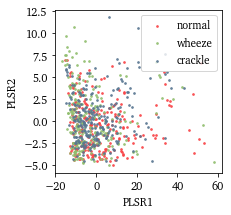

In [46]:
y_train_f = pd.factorize(y_train)

pls2 = PLSRegression(n_components=2)
p2 = pls2.fit_transform(X_train.iloc[indices_train], y_train_f[0])
f, ax = helper.scatterplot_with_colors(p2[0], y_train_f[0],
                                       module_path, new_legends = list(y_train_f[1]),
                                       x_y_labels = ['PLSR1', 'PLSR2'])

plt.show()

f.savefig(figure_path + f'kaggle_vs_uit/PLSR_rocket_15s.pdf', bbox_inches='tight')

## Testing classifiers


**Tromsø dataset**

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5).fit(X_train.iloc[indices_train] , y_train.iloc[indices_train])

In [33]:
CV_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,
                       random_state=42)

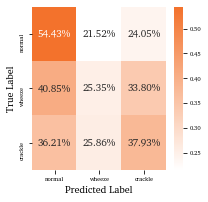

In [47]:
from sklearn.ensemble import RandomForestClassifier

class_names =  list(pd.factorize(y_train)[1])
#clf = RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=500,random_state=42)
#clf = GaussianNB()
clf = KNeighborsClassifier(n_neighbors=4, weights='distance')


clf.fit(X_train.iloc[indices_train] , y_train)
y_pred = clf.predict(X_test.iloc[indices_test])

#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)

f, ax = utility.plot_cm(y_test , y_pred, module_path = module_path, class_names = class_names, color_index = 1)

f.savefig(figure_path + f'kaggle_vs_uit/cm_uit_rocket_15s.pdf', bbox_inches='tight')